<font size=8> Network Tests


In [1]:
#Common Python Packages
from pickle import TRUE
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeout_decorator

#dynapse2 spikegen imports
from lib.dynapse2_util import *
from lib.dynapse2_network import Network
from lib.dynapse2_spikegen import send_events,get_fpga_time, send_virtual_events, poisson_gen, isi_gen,regular_gen
from lib.dynapse2_raster import *
from lib.dynapse2_obj import *

#Statistics imports
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from itertools import product

#my imports
from adaptation import pc_single,ff,pc_pv_sst,ff_network
from adaptation_lib.spike_stats import *
from adaptation_lib.dynapse_setup import *
from adaptation_lib.graphing import *
from configs import neuron_configs_bio

# Determine the user's home directory
home_directory = os.path.expanduser("~")
# Path to the Documents directory
documents_path = os.path.join(home_directory, "Documents")
# Path to the dynapse-se2-data directory within Documents
save_directory_path = os.path.join(documents_path, "dynapse-se2-data")
# Path to the data
data_type_path = os.path.join(save_directory_path, "EI_tests")

@timeout_decorator.timeout(40)# Set a 5-second timeout
def run_simulation(neuron_config):
    return pc_pv_sst.pc_pv_sst(
        board=board,
        profile_path=profile_path,
        number_of_chips=number_of_chips,
        neuron_config=neuron_config
    )

In [2]:
[board,profile_path,number_of_chips]=obtain_board()

<font size=8> SWEEP

In [7]:

neuron_config=neuron_configs_bio.config()
neuron_config['Input_SST']=0#.1#.1
neuron_config['PC_SST']=0#.1

neuron_config['PC_Adaptation']=True
neuron_config['duration']=1
neuron_config['input_type']='Regular'
neuron_config['in_freq']=20

#input frequencies and conneciton ratiors
input_frequencies=np.arange(1,31,1)
connection_ratios=np.arange(0,.7,.1)

data=os.path.join(data_type_path, "EE_sweep_regular.npy")
# Check if the data file exists
if os.path.exists(data):
    # Load existing data
    simulation_data = np.load(data, allow_pickle=True).item()
else:
    if not os.path.exists(data):
        # If not, initialize with NaNs for every combination
        simulation_data = {
            "cv_values_pc": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "cv_values_pv": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "synchrony_values_pc": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "synchrony_values_pv": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "mean_pc_rates": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "input_frequencies": np.arange(1, 21, 1),
            "connection_ratios": np.arange(0, .7, .1)
        }

def contains_nan(input_freq, connection_ratio):
    input_idx = np.argmin(np.abs(np.array(simulation_data["input_frequencies"]) - input_freq))
    conn_idx = np.argmin(np.abs(np.array(simulation_data["connection_ratios"]) - connection_ratio))
    
    index = len(simulation_data["connection_ratios"]) * input_idx + conn_idx
    
    return np.isnan(simulation_data["cv_values_pc"][index]) or \
           np.isnan(simulation_data["cv_values_pv"][index]) or \
           np.isnan(simulation_data["synchrony_values_pc"][index]) or \
           np.isnan(simulation_data["synchrony_values_pv"][index]) or \
           np.isnan(simulation_data["mean_pc_rates"][index])


for input_freq in simulation_data["input_frequencies"]:
    neuron_config['input_frequency'] = input_freq
    for connection_ratio in simulation_data["connection_ratios"]:
        # Only run the simulation if the data for this configuration contains NaN values
        if contains_nan(input_freq, connection_ratio):
            neuron_config['PC_PC'] = connection_ratio
            try:
                [output_events, test_config] = run_simulation(neuron_config)

                cv_temp, synchrony_temp = run_dynamic_anal(output_events, test_config)

                rates = spike_count(output_events=output_events)
                PC_rates, _, _ = pop_rates(rates, test_config)

                # Update the results in the loaded/initialized data
                index = len(simulation_data["connection_ratios"]) * list(simulation_data["input_frequencies"]).index(input_freq) + list(simulation_data["connection_ratios"]).index(connection_ratio)
                simulation_data["cv_values_pc"][index] = cv_temp[0]
                simulation_data["cv_values_pv"][index] = cv_temp[1]
                simulation_data["synchrony_values_pc"][index] = synchrony_temp[0]
                simulation_data["synchrony_values_pv"][index] = synchrony_temp[1]
                simulation_data["mean_pc_rates"][index] = np.mean(PC_rates)
            except timeout_decorator.TimeoutError:
                print("Simulation timed out for input frequency %d and connection ratio %.2f" % (input_freq, connection_ratio))
                index = len(simulation_data["connection_ratios"]) * list(simulation_data["input_frequencies"]).index(input_freq) + list(simulation_data["connection_ratios"]).index(connection_ratio)
                # You might want to update the corresponding values to NaN if timeout occurs. Depends on your preference.
                simulation_data["cv_values_pc"][index] = np.nan
                simulation_data["cv_values_pv"][index] = np.nan
                simulation_data["synchrony_values_pc"][index] = np.nan
                simulation_data["synchrony_values_pv"][index] = np.nan
                simulation_data["mean_pc_rates"][index] = np.nan

# Save the updated data
if not os.path.exists(data_type_path):
    os.makedirs(data_type_path)
np.save(os.path.join(data_type_path, "EE_sweep_regular.npy"), simulation_data)



Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 1 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 2 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 3 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 4 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 5 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 6 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 7 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 8 and connection ratio 0.60
Setting Latches


In [8]:
import numpy as np
import os
neuron_config=neuron_configs_bio.config()


neuron_config['Input_SST']=0#.1#.1

neuron_config['PC_SST']=0#.1

neuron_config['PC_Adaptation']=True
neuron_config['duration']=1
neuron_config['input_type']='Regular'
neuron_config['in_freq']=20

#input frequencies and conneciton ratiors
input_frequencies=np.arange(1,31,1)
connection_ratios=np.arange(0,.7,.1)

data=os.path.join(data_type_path, "EI_sweep_regular.npy")
# Check if the data file exists
if os.path.exists(data):
    # Load existing data
    simulation_data = np.load(data, allow_pickle=True).item()
else:
    if not os.path.exists(data):
        # If not, initialize with NaNs for every combination
        simulation_data = {
            "cv_values_pc": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "cv_values_pv": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "synchrony_values_pc": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "synchrony_values_pv": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "mean_pc_rates": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "input_frequencies": np.arange(1, 21, 1),
            "connection_ratios": np.arange(0, .7, .1)
        }

def contains_nan(input_freq, connection_ratio):
    input_idx = np.argmin(np.abs(np.array(simulation_data["input_frequencies"]) - input_freq))
    conn_idx = np.argmin(np.abs(np.array(simulation_data["connection_ratios"]) - connection_ratio))
    
    index = len(simulation_data["connection_ratios"]) * input_idx + conn_idx
    
    return np.isnan(simulation_data["cv_values_pc"][index]) or \
           np.isnan(simulation_data["cv_values_pv"][index]) or \
           np.isnan(simulation_data["synchrony_values_pc"][index]) or \
           np.isnan(simulation_data["synchrony_values_pv"][index]) or \
           np.isnan(simulation_data["mean_pc_rates"][index])


for input_freq in simulation_data["input_frequencies"]:
    neuron_config['input_frequency'] = input_freq
    for connection_ratio in simulation_data["connection_ratios"]:
        # Only run the simulation if the data for this configuration contains NaN values
        if contains_nan(input_freq, connection_ratio):
            neuron_config['PV_PC'] = connection_ratio
            try:
                [output_events, test_config] = run_simulation(neuron_config)

                cv_temp, synchrony_temp = run_dynamic_anal(output_events, test_config)

                rates = spike_count(output_events=output_events)
                PC_rates, _, _ = pop_rates(rates, test_config)

                # Update the results in the loaded/initialized data
                index = len(simulation_data["connection_ratios"]) * list(simulation_data["input_frequencies"]).index(input_freq) + list(simulation_data["connection_ratios"]).index(connection_ratio)
                simulation_data["cv_values_pc"][index] = cv_temp[0]
                simulation_data["cv_values_pv"][index] = cv_temp[1]
                simulation_data["synchrony_values_pc"][index] = synchrony_temp[0]
                simulation_data["synchrony_values_pv"][index] = synchrony_temp[1]
                simulation_data["mean_pc_rates"][index] = np.mean(PC_rates)
            except timeout_decorator.TimeoutError:
                print("Simulation timed out for input frequency %d and connection ratio %.2f" % (input_freq, connection_ratio))
                index = len(simulation_data["connection_ratios"]) * list(simulation_data["input_frequencies"]).index(input_freq) + list(simulation_data["connection_ratios"]).index(connection_ratio)
                # You might want to update the corresponding values to NaN if timeout occurs. Depends on your preference.
                simulation_data["cv_values_pc"][index] = np.nan
                simulation_data["cv_values_pv"][index] = np.nan
                simulation_data["synchrony_values_pc"][index] = np.nan
                simulation_data["synchrony_values_pv"][index] = np.nan
                simulation_data["mean_pc_rates"][index] = np.nan

# Save the updated data
if not os.path.exists(data_type_path):
    os.makedirs(data_type_path)
np.save(os.path.join(data_type_path, "EI_sweep_regular.npy"), simulation_data)



In [9]:
import numpy as np
import os
neuron_config=neuron_configs_bio.config()


neuron_config['Input_SST']=0#.1#.1

neuron_config['PC_SST']=0#.1

neuron_config['PC_Adaptation']=True
neuron_config['duration']=1
neuron_config['input_type']='Regular'
neuron_config['in_freq']=20

#input frequencies and conneciton ratiors
input_frequencies=np.arange(1,31,1)
connection_ratios=np.arange(0,.7,.1)

data=os.path.join(data_type_path, "EI_sweep_poisson.npy")
# Check if the data file exists
if os.path.exists(data):
    # Load existing data
    simulation_data = np.load(data, allow_pickle=True).item()
else:
    if not os.path.exists(data):
        # If not, initialize with NaNs for every combination
        simulation_data = {
            "cv_values_pc": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "cv_values_pv": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "synchrony_values_pc": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "synchrony_values_pv": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "mean_pc_rates": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "input_frequencies": np.arange(1, 21, 1),
            "connection_ratios": np.arange(0, .7, .1)
        }

def contains_nan(input_freq, connection_ratio):
    input_idx = np.argmin(np.abs(np.array(simulation_data["input_frequencies"]) - input_freq))
    conn_idx = np.argmin(np.abs(np.array(simulation_data["connection_ratios"]) - connection_ratio))
    
    index = len(simulation_data["connection_ratios"]) * input_idx + conn_idx
    
    return np.isnan(simulation_data["cv_values_pc"][index]) or \
           np.isnan(simulation_data["cv_values_pv"][index]) or \
           np.isnan(simulation_data["synchrony_values_pc"][index]) or \
           np.isnan(simulation_data["synchrony_values_pv"][index]) or \
           np.isnan(simulation_data["mean_pc_rates"][index])

for input_freq in simulation_data["input_frequencies"]:
    neuron_config['input_frequency'] = input_freq
    for connection_ratio in simulation_data["connection_ratios"]:
        # Only run the simulation if the data for this configuration contains NaN values
        if contains_nan(input_freq, connection_ratio):
            neuron_config['PV_PC'] = connection_ratio
            try:
                [output_events, test_config] = run_simulation(neuron_config)

                cv_temp, synchrony_temp = run_dynamic_anal(output_events, test_config)

                rates = spike_count(output_events=output_events)
                PC_rates, _, _ = pop_rates(rates, test_config)

                # Update the results in the loaded/initialized data
                index = len(simulation_data["connection_ratios"]) * list(simulation_data["input_frequencies"]).index(input_freq) + list(simulation_data["connection_ratios"]).index(connection_ratio)
                simulation_data["cv_values_pc"][index] = cv_temp[0]
                simulation_data["cv_values_pv"][index] = cv_temp[1]
                simulation_data["synchrony_values_pc"][index] = synchrony_temp[0]
                simulation_data["synchrony_values_pv"][index] = synchrony_temp[1]
                simulation_data["mean_pc_rates"][index] = np.mean(PC_rates)
            except timeout_decorator.TimeoutError:
                print("Simulation timed out for input frequency %d and connection ratio %.2f" % (input_freq, connection_ratio))
                index = len(simulation_data["connection_ratios"]) * list(simulation_data["input_frequencies"]).index(input_freq) + list(simulation_data["connection_ratios"]).index(connection_ratio)
                # You might want to update the corresponding values to NaN if timeout occurs. Depends on your preference.
                simulation_data["cv_values_pc"][index] = np.nan
                simulation_data["cv_values_pv"][index] = np.nan
                simulation_data["synchrony_values_pc"][index] = np.nan
                simulation_data["synchrony_values_pv"][index] = np.nan
                simulation_data["mean_pc_rates"][index] = np.nan

# Save the updated data
if not os.path.exists(data_type_path):
    os.makedirs(data_type_path)
np.save(os.path.join(data_type_path, "EI_sweep_poisson.npy"), simulation_data)



In [10]:

neuron_config=neuron_configs_bio.config()
neuron_config['Input_SST']=0#.1#.1
neuron_config['PC_SST']=0#.1

neuron_config['PC_Adaptation']=True
neuron_config['duration']=1
neuron_config['input_type']='Poisson'
neuron_config['in_freq']=20

#input frequencies and conneciton ratiors
input_frequencies=np.arange(1,31,1)
connection_ratios=np.arange(0,.7,.1)

data=os.path.join(data_type_path, "EE_sweep_poisson.npy")
# Check if the data file exists
if os.path.exists(data):
    # Load existing data
    simulation_data = np.load(data, allow_pickle=True).item()
else:
    if not os.path.exists(data):
        # If not, initialize with NaNs for every combination
        simulation_data = {
            "cv_values_pc": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "cv_values_pv": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "synchrony_values_pc": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "synchrony_values_pv": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "mean_pc_rates": [np.nan] * len(input_frequencies) * len(connection_ratios),
            "input_frequencies": np.arange(1, 21, 1),
            "connection_ratios": np.arange(0, .7, .1)
        }

def contains_nan(input_freq, connection_ratio):
    input_idx = np.argmin(np.abs(np.array(simulation_data["input_frequencies"]) - input_freq))
    conn_idx = np.argmin(np.abs(np.array(simulation_data["connection_ratios"]) - connection_ratio))
    
    index = len(simulation_data["connection_ratios"]) * input_idx + conn_idx
    
    return np.isnan(simulation_data["cv_values_pc"][index]) or \
           np.isnan(simulation_data["cv_values_pv"][index]) or \
           np.isnan(simulation_data["synchrony_values_pc"][index]) or \
           np.isnan(simulation_data["synchrony_values_pv"][index]) or \
           np.isnan(simulation_data["mean_pc_rates"][index])


for input_freq in simulation_data["input_frequencies"]:
    neuron_config['input_frequency'] = input_freq
    for connection_ratio in simulation_data["connection_ratios"]:
        # Only run the simulation if the data for this configuration contains NaN values
        if contains_nan(input_freq, connection_ratio):
            neuron_config['PC_PC'] = connection_ratio
            try:
                [output_events, test_config] = run_simulation(neuron_config)

                cv_temp, synchrony_temp = run_dynamic_anal(output_events, test_config)

                rates = spike_count(output_events=output_events)
                PC_rates, _, _ = pop_rates(rates, test_config)

                # Update the results in the loaded/initialized data
                index = len(simulation_data["connection_ratios"]) * list(simulation_data["input_frequencies"]).index(input_freq) + list(simulation_data["connection_ratios"]).index(connection_ratio)
                simulation_data["cv_values_pc"][index] = cv_temp[0]
                simulation_data["cv_values_pv"][index] = cv_temp[1]
                simulation_data["synchrony_values_pc"][index] = synchrony_temp[0]
                simulation_data["synchrony_values_pv"][index] = synchrony_temp[1]
                simulation_data["mean_pc_rates"][index] = np.mean(PC_rates)
            except timeout_decorator.TimeoutError:
                print("Simulation timed out for input frequency %d and connection ratio %.2f" % (input_freq, connection_ratio))
                index = len(simulation_data["connection_ratios"]) * list(simulation_data["input_frequencies"]).index(input_freq) + list(simulation_data["connection_ratios"]).index(connection_ratio)
                # You might want to update the corresponding values to NaN if timeout occurs. Depends on your preference.
                simulation_data["cv_values_pc"][index] = np.nan
                simulation_data["cv_values_pv"][index] = np.nan
                simulation_data["synchrony_values_pc"][index] = np.nan
                simulation_data["synchrony_values_pv"][index] = np.nan
                simulation_data["mean_pc_rates"][index] = np.nan

# Save the updated data
if not os.path.exists(data_type_path):
    os.makedirs(data_type_path)
np.save(os.path.join(data_type_path, "EE_sweep_poisson.npy"), simulation_data)

Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 1 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 2 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 3 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 4 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 5 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 6 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 7 and connection ratio 0.60
Setting Latches
Setting up network
Adding connections
Simulation timed out for input frequency 8 and connection ratio 0.60
Setting Latches


KeyboardInterrupt: 

<font size=8> plotting

In [98]:


FONT_SIZE = 12
plt.rcParams['font.size'] = FONT_SIZE

def plot_heatmap(data_matrix, ax, cmap, xlabel, ylabel, title, cbar_label,
                 x_ticks, x_ticklabels, y_ticks, y_ticklabels):
    """
    Helper function to plot a heatmap.
    """
    sns.heatmap(data_matrix[::-1], ax=ax, cmap=cmap, cbar_kws={'label': cbar_label})  # <-- Reverse the rows here
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticklabels)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticklabels[::-1])  # <-- Reverse the yticklabels here
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
def visualize_simulation_data(data,title='insert_title'):
    """
    Load and visualize simulation data.
    """
    input_frequencies = np.arange(1,31,1)

    # Extract the data
    cv_values_pc = np.array(data['cv_values_pc']).reshape(len(input_frequencies), -1)
    synchrony_values_pc = np.array(data['synchrony_values_pc']).reshape(len(input_frequencies), -1)
    mean_pc_rates = np.array(data['mean_pc_rates']).reshape(len(input_frequencies), -1)

    connection_ratios = [round(x, 1) for x in data['connection_ratios']]
    
    y_ticks = np.arange(0, len(input_frequencies), 5)
    y_ticklabels = [input_frequencies[i] for i in y_ticks]
    x_ticks = np.arange(len(connection_ratios)) + 0.5
    x_ticklabels = connection_ratios
    
    # Plotting
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    #add title
    fig.suptitle(title, fontsize=16)
    
    plot_heatmap(cv_values_pc, ax[0], 'viridis', 'Connection Ratios', 'Input Frequencies', 'CV Values PC', 'CV Values PC', x_ticks, x_ticklabels, y_ticks, y_ticklabels)
    plot_heatmap(synchrony_values_pc, ax[1], 'viridis', 'Connection Ratios', 'Input Frequencies', 'Synchrony Values PC', 'Synchrony Values PC', x_ticks, x_ticklabels, y_ticks, y_ticklabels)
    plot_heatmap(mean_pc_rates, ax[2], 'viridis', 'Connection Ratios', 'Input Frequencies', 'Mean Firing Rates PC', 'Mean Firing Rates PC', x_ticks, x_ticklabels, y_ticks, y_ticklabels)
    
    plt.tight_layout()
    plt.show()

# Example usage
# visualize_simulation_data("/path/to/data/type")


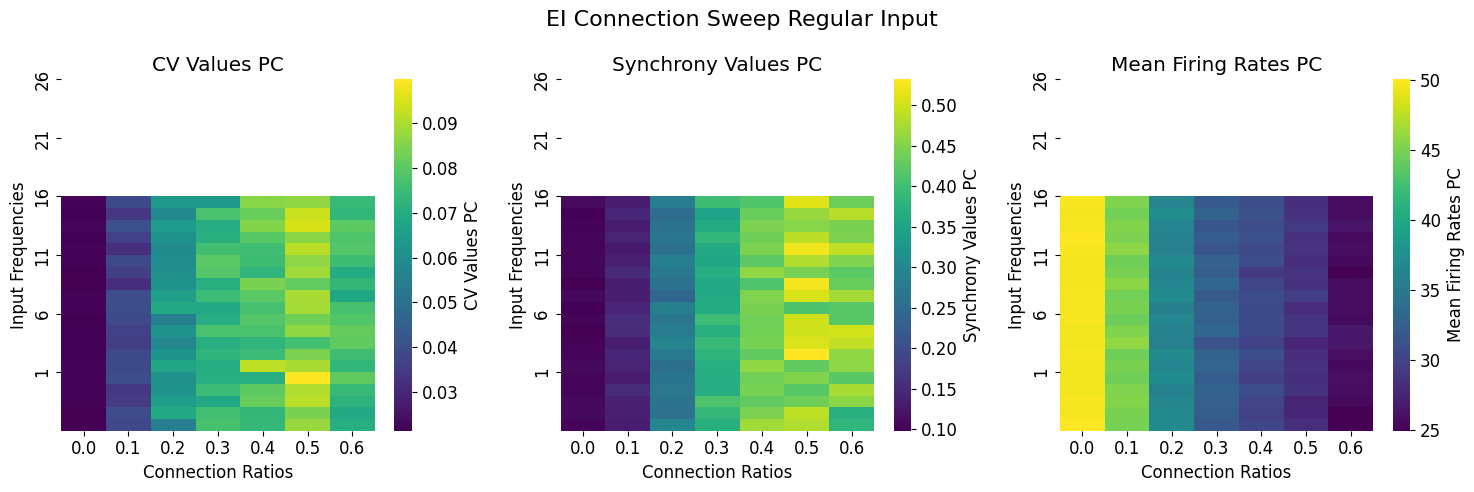

In [101]:
data_path = os.path.join(data_type_path, "EI_sweep_regular.npy")
data = np.load(data_path, allow_pickle=True).item()
visualize_simulation_data(data,title='EI Connection Sweep Regular Input')



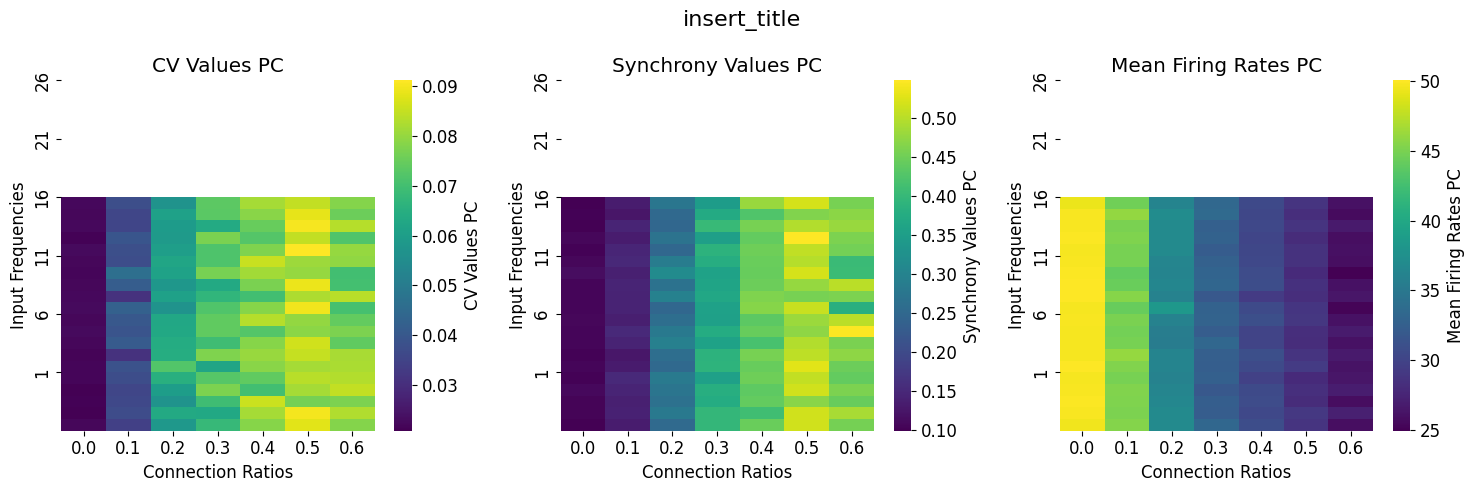

In [100]:
data_path = os.path.join(data_type_path, "EI_sweep_poisson.npy")
data = np.load(data_path, allow_pickle=True).item()
visualize_simulation_data(data,title='EI Connection Sweep Regular Input')

In [86]:
np.arange(1,31,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])